# Segmentación CLIENTELA
## Agrupamiento - Clustering - K means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos los datos

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
# Subir archivo
uploaded = files.upload()
# Leer archivo CSV
for filename in uploaded.keys():
  df = pd.read_excel(filename, sheet_name='Hoja1')
# Mostrar las primeras filas del DataFrame
df.head()

Saving BD_proyecto_DMC(grupal).xlsx to BD_proyecto_DMC(grupal) (4).xlsx


,ID_CLIENTE,FLG_CAMPAÑA,ANTIGUEDAD_PRODUC,EST_CIVIL,F33_EDAD,F33_SEXO_3,F33_GRADO_INS_3,F21_DEPARTAMENTO,INGRESO_PROM_INDEPEN,NUM_CTAS_AHORRO,...,FLG_PE_SEG,FLG_SOAT_SEG,SDSBOLSO_MYPE,DEUDA_MYPE,NCUOTAS_MYPE,STASA_MYPE,DIAS_ATRASO_MYPE,SALDO_MYPE_RCC,CTD_ENTIDADES_RCC,SALDO_TOTAL_RCC
0,8,0,137,SOLTERO,74,FEMENINO,SUPERIOR TECNICO,LA LIBERTAD,4227.3883,1,...,0,0,30000.0,30000.00,36,21.00,0,149345.89,3.0,151338.31
1,9,0,303,VIUDO,70,FEMENINO,SUPERIOR TECNICO,LA LIBERTAD,2425.7142,3,...,0,0,7000.0,3620.39,24,47.65,0,7811.76,5.0,37821.53
2,10,1,239,SOLTERO,68,FEMENINO,SECUNDARIA,LA LIBERTAD,7880.1366,1,...,0,0,30000.0,30000.00,12,26.15,0,62496.90,2.0,62496.90
3,18,1,215,CASADO,58,FEMENINO,SECUNDARIA,LA LIBERTAD,6072.9414,1,...,0,0,118060.0,31085.20,48,16.70,0,34752.59,2.0,34752.59
4,25,1,11,CASADO,74,MASCULINO,SECUNDARIA,LA LIBERTAD,8383.0200,1,...,0,0,30060.0,18460.77,24,32.50,0,53764.04,3.0,56158.68


Resumen Estadístico de las Variables:
                      count unique          top freq          mean  \
ID_CLIENTE            445.0    NaN          NaN  NaN    520.719101   
FLG_CAMPAÑA           445.0    NaN          NaN  NaN      0.314607   
ANTIGUEDAD_PRODUC     445.0    NaN          NaN  NaN    123.094382   
EST_CIVIL               445      6      SOLTERO  292           NaN   
F33_EDAD              445.0    NaN          NaN  NaN     50.083146   
F33_SEXO_3              445      2     FEMENINO  247           NaN   
F33_GRADO_INS_3         445      7   SECUNDARIA  295           NaN   
F21_DEPARTAMENTO        445      3  LA LIBERTAD  442           NaN   
INGRESO_PROM_INDEPEN  445.0    NaN          NaN  NaN   7481.611204   
NUM_CTAS_AHORRO       445.0    NaN          NaN  NaN      1.355056   
CTD_SEG               445.0    NaN          NaN  NaN      0.276404   
FLG_SEPE_SEG          445.0    NaN          NaN  NaN      0.110112   
FLG_PT_SEG            445.0    NaN          NaN  NaN

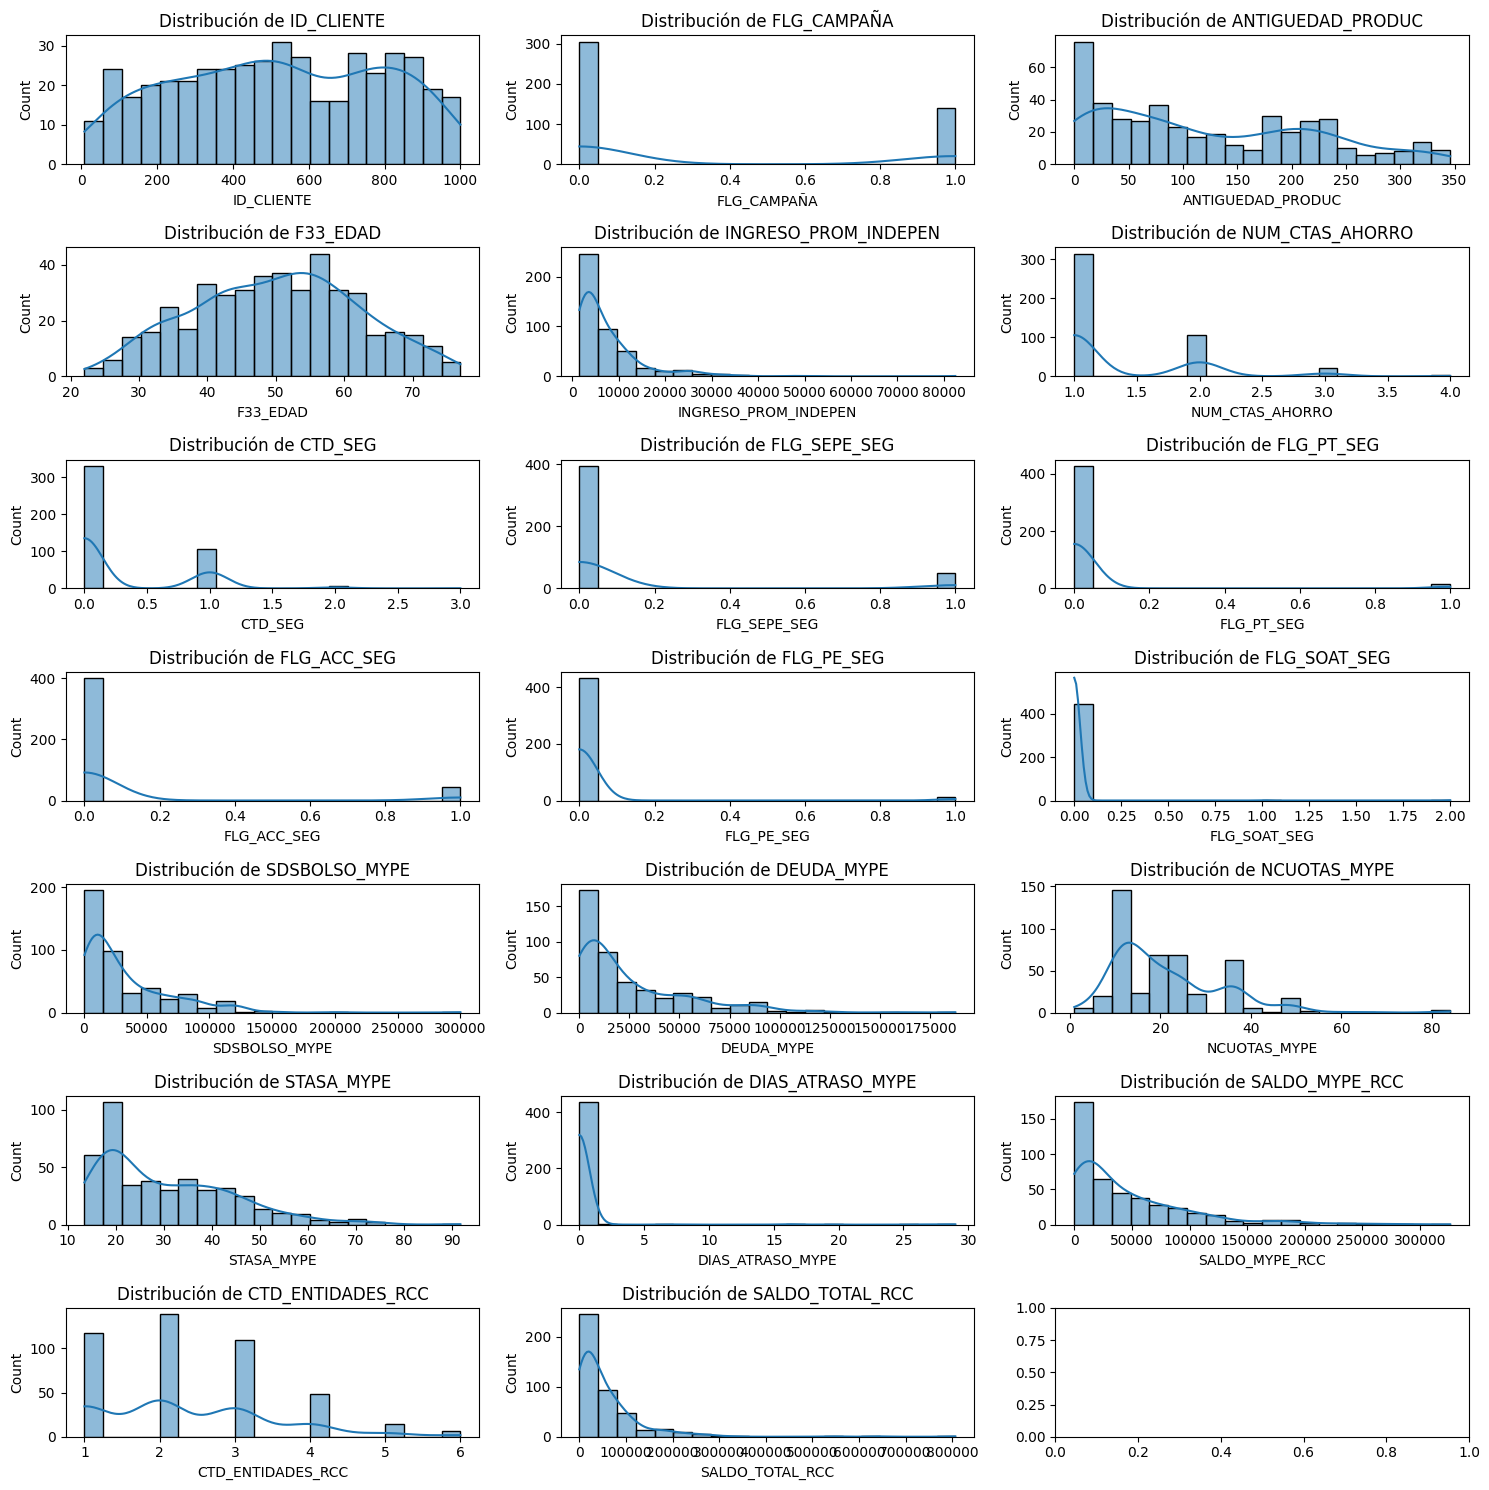


Generando gráficos de barras para variables categóricas...


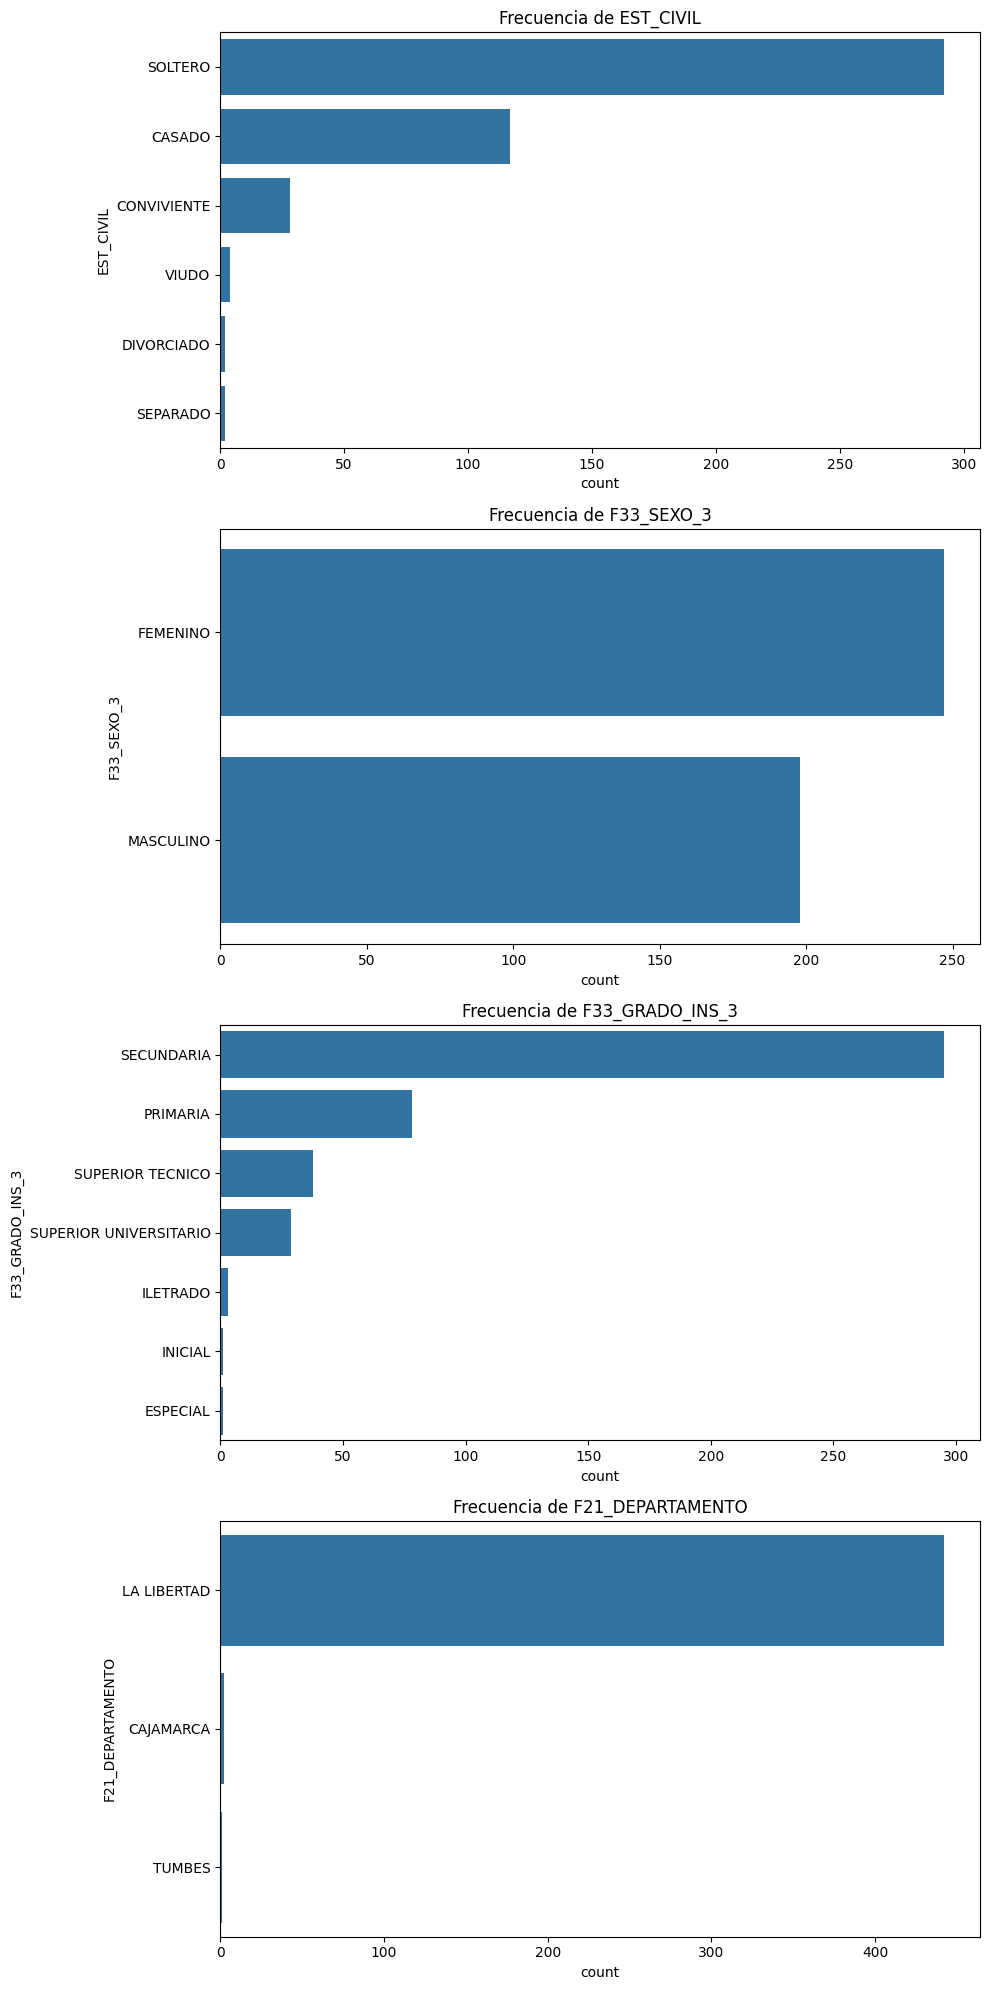


Generando matriz de correlación...


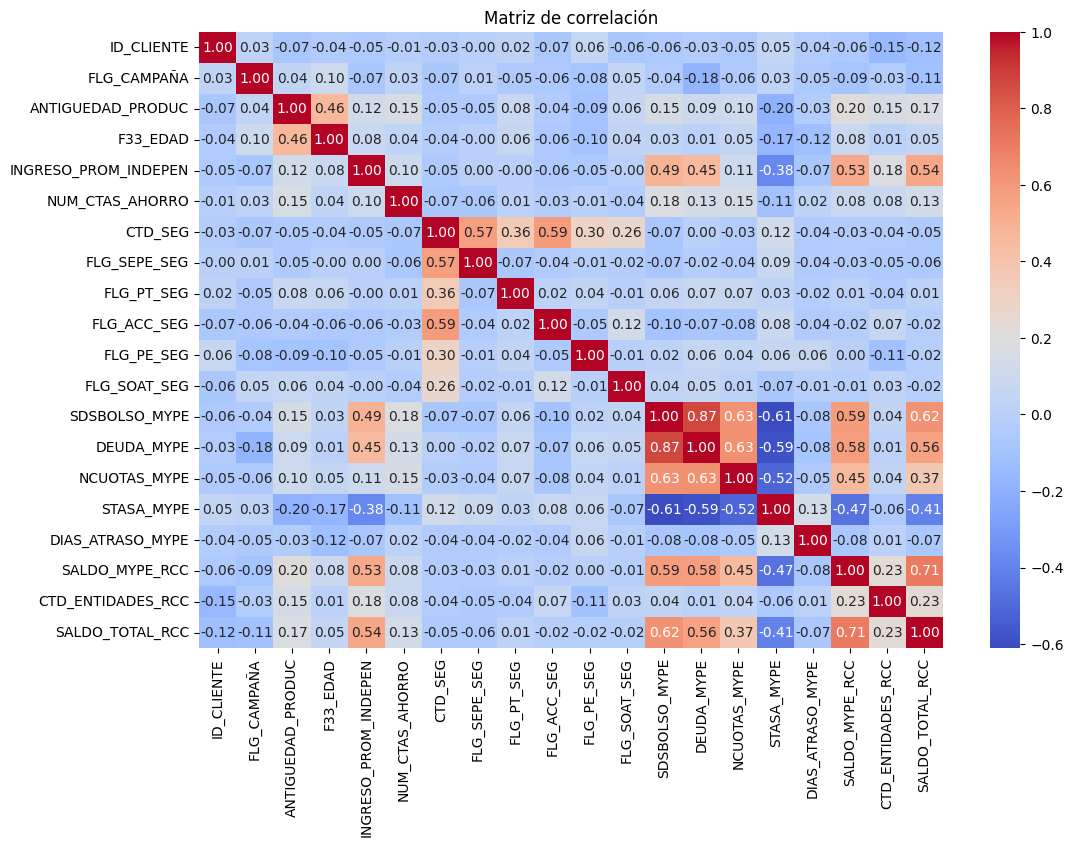


Generando boxplots para detectar outliers...


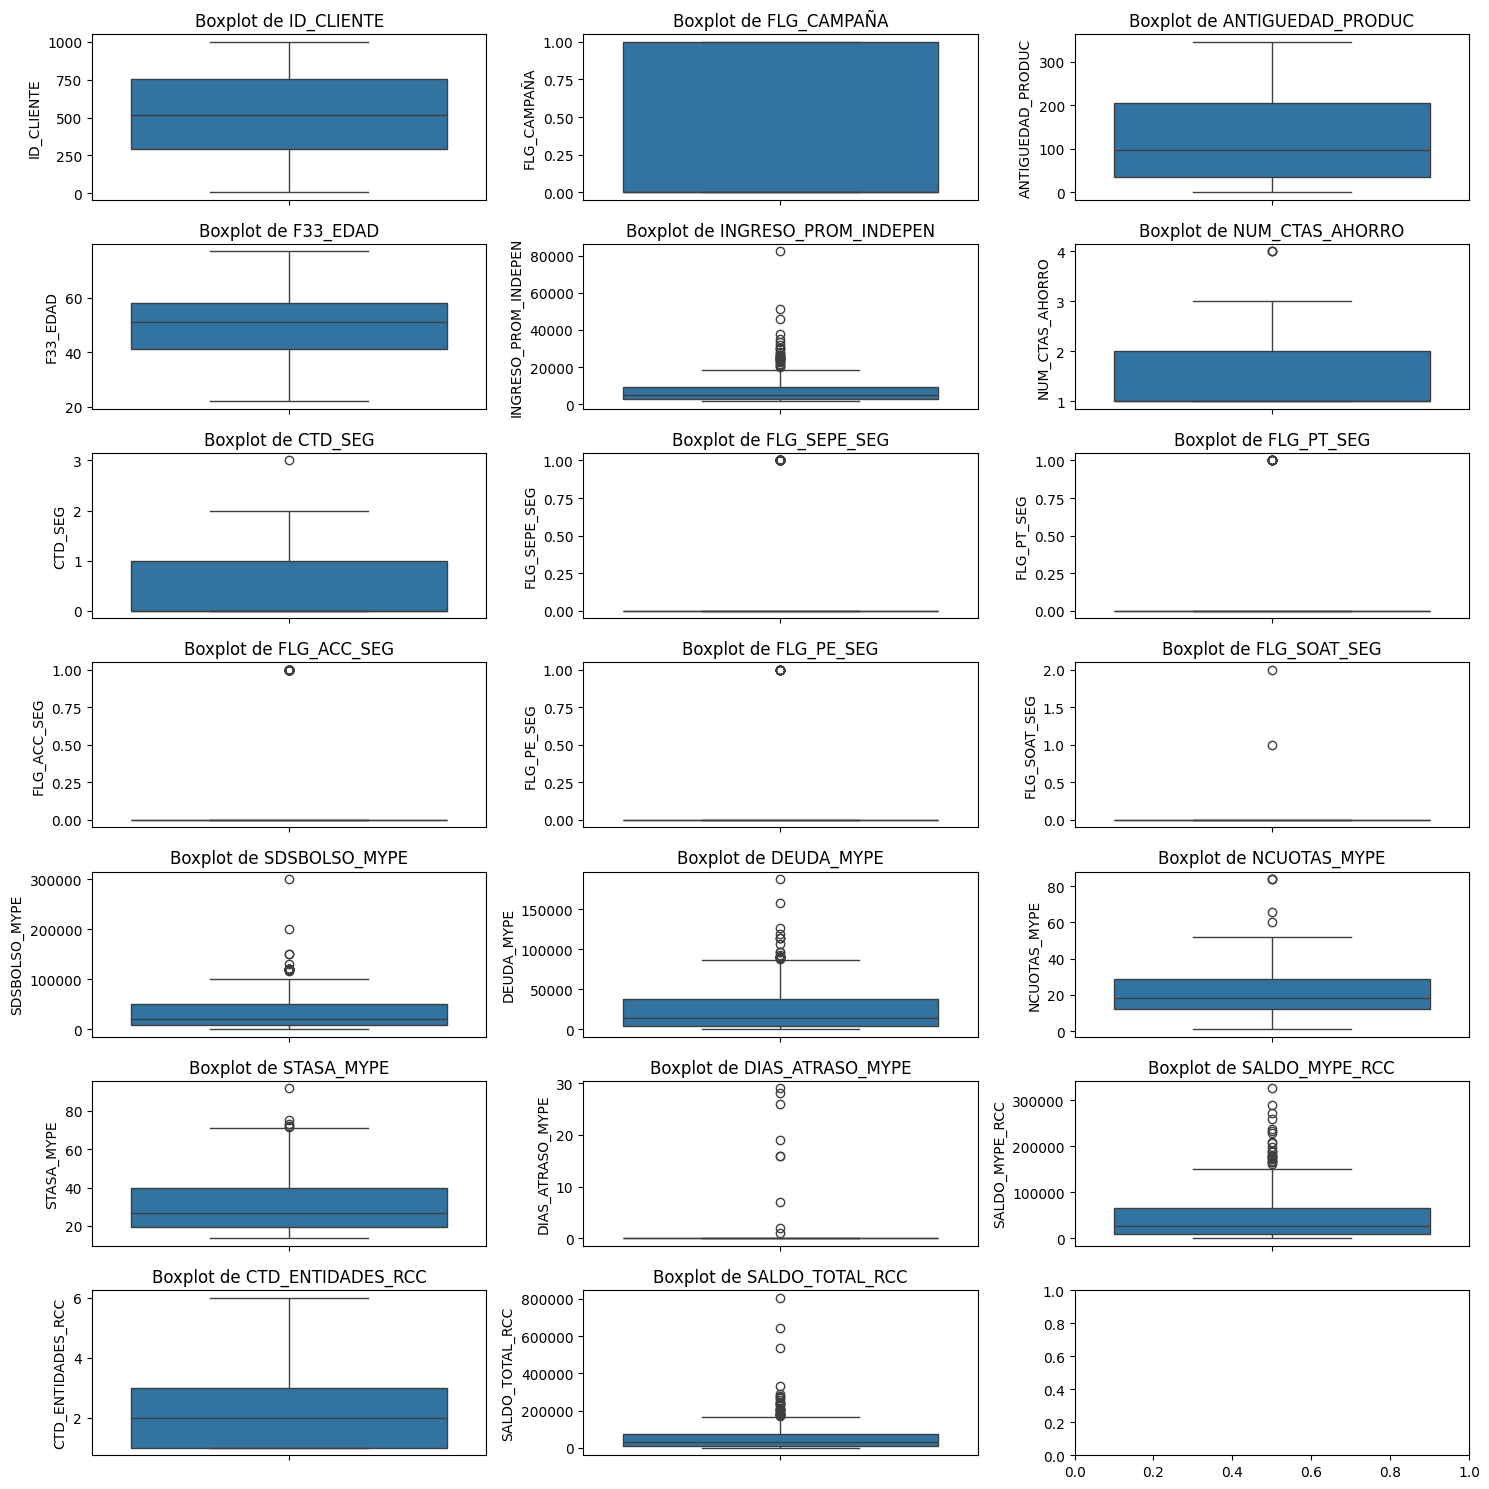

In [ ]:
# 1. Resumen Estadístico
print("Resumen Estadístico de las Variables:")
desc_stats = df.describe(include='all').T
print(desc_stats)

# 2. Valores Nulos
print("\nPorcentaje de Valores Nulos:")
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])

# Separar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# 3. Visualización de Variables Numéricas
print("\nGenerando histogramas de variables numéricas...")
fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# 4. Visualización de Variables Categóricas
print("\nGenerando gráficos de barras para variables categóricas...")
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 5 * len(cat_cols)))
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Frecuencia de {col}")
plt.tight_layout()
plt.show()

# 5. Matriz de Correlación
print("\nGenerando matriz de correlación...")
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 6. Boxplots para Outliers
print("\nGenerando boxplots para detectar outliers...")
fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['ID_CLIENTE', 'F33_SEXO_3', 'F21_DEPARTAMENTO', 'DEUDA_MYPE', 'SALDO_MYPE_RCC', 'FLG_SEPE_SEG', 'FLG_PT_SEG', 'FLG_ACC_SEG', 'FLG_PE_SEG', 'FLG_SOAT_SEG'])

In [ ]:
df.columns.values

array(['FLG_CAMPAÑA', 'ANTIGUEDAD_PRODUC', 'EST_CIVIL', 'F33_EDAD',
       'F33_GRADO_INS_3', 'INGRESO_PROM_INDEPEN', 'NUM_CTAS_AHORRO',
       'CTD_SEG', 'SDSBOLSO_MYPE', 'NCUOTAS_MYPE', 'STASA_MYPE',
       'DIAS_ATRASO_MYPE', 'CTD_ENTIDADES_RCC', 'SALDO_TOTAL_RCC'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLG_CAMPAÑA           445 non-null    int64  
 1   ANTIGUEDAD_PRODUC     445 non-null    int64  
 2   EST_CIVIL             445 non-null    object 
 3   F33_EDAD              445 non-null    int64  
 4   F33_GRADO_INS_3       445 non-null    object 
 5   INGRESO_PROM_INDEPEN  445 non-null    float64
 6   NUM_CTAS_AHORRO       445 non-null    int64  
 7   CTD_SEG               445 non-null    int64  
 8   SDSBOLSO_MYPE         445 non-null    float64
 9   NCUOTAS_MYPE          445 non-null    int64  
 10  STASA_MYPE            445 non-null    float64
 11  DIAS_ATRASO_MYPE      445 non-null    int64  
 12  CTD_ENTIDADES_RCC     433 non-null    float64
 13  SALDO_TOTAL_RCC       433 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 48.8+ KB


In [ ]:
datos_numericos = df.select_dtypes(include=['float64', "int64"])
datos_categoricos = df.select_dtypes(exclude=['float64', "int64"])

In [ ]:
datos_categoricos.head()

,EST_CIVIL,F33_GRADO_INS_3
0,SOLTERO,SUPERIOR TECNICO
1,VIUDO,SUPERIOR TECNICO
2,SOLTERO,SECUNDARIA
3,CASADO,SECUNDARIA
4,CASADO,SECUNDARIA


In [ ]:
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

<ipython-input-11-eb825376fe86>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)


Un aspecto importante a tener en cuenta cuando usamos Kmedias es que las distancias dependen de las escalas de las variables. Por lo tanto, es conveniente normalizar datos antes de continuar

In [ ]:
datos_numericos.describe()

,FLG_CAMPAÑA,ANTIGUEDAD_PRODUC,F33_EDAD,INGRESO_PROM_INDEPEN,NUM_CTAS_AHORRO,CTD_SEG,SDSBOLSO_MYPE,NCUOTAS_MYPE,STASA_MYPE,DIAS_ATRASO_MYPE,CTD_ENTIDADES_RCC,SALDO_TOTAL_RCC
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000
mean,0.314607,123.094382,50.083146,7481.611204,1.355056,0.276404,33575.016719,21.424719,30.60809,0.323596,2.355658,56314.639099
std,0.464882,98.357754,12.035414,7847.269754,0.603856,0.495480,35919.561521,12.402478,13.86488,2.676812,1.148078,75853.923281
min,0.000000,0.000000,22.000000,1501.300000,1.000000,0.000000,548.000000,1.000000,13.48000,0.000000,1.000000,141.590000
25%,0.000000,34.000000,41.000000,2665.670000,1.000000,0.000000,8000.000000,12.000000,19.29000,0.000000,1.000000,11801.470000
50%,0.000000,98.000000,51.000000,4839.095500,1.000000,0.000000,20000.000000,18.000000,27.00000,0.000000,2.000000,33860.980000
75%,1.000000,206.000000,58.000000,9265.760000,2.000000,1.000000,50000.000000,29.000000,40.00000,0.000000,3.000000,72447.200000
max,1.000000,346.000000,77.000000,82451.135000,4.000000,3.000000,300000.000000,84.000000,91.80000,29.000000,6.000000,806567.650000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns)

In [ ]:
datos_numericos_normalizado.describe()

,FLG_CAMPAÑA,ANTIGUEDAD_PRODUC,F33_EDAD,INGRESO_PROM_INDEPEN,NUM_CTAS_AHORRO,CTD_SEG,SDSBOLSO_MYPE,NCUOTAS_MYPE,STASA_MYPE,DIAS_ATRASO_MYPE,CTD_ENTIDADES_RCC,SALDO_TOTAL_RCC
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.314607,0.355764,0.510603,0.073877,0.118352,0.092135,0.110292,0.246081,0.218694,0.011158,0.271132,0.069657
std,0.464882,0.284271,0.218826,0.096940,0.201285,0.165160,0.119951,0.149427,0.177029,0.092304,0.229616,0.094062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.098266,0.345455,0.014384,0.000000,0.000000,0.024885,0.132530,0.074183,0.000000,0.000000,0.014459
50%,0.000000,0.283237,0.527273,0.041233,0.000000,0.000000,0.064959,0.204819,0.172625,0.000000,0.200000,0.041813
75%,1.000000,0.595376,0.654545,0.095917,0.333333,0.333333,0.165142,0.337349,0.338611,0.000000,0.400000,0.089662
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True, dtype="int")

In [ ]:
datos_categoricos.head()

,EST_CIVIL,F33_GRADO_INS_3
0,SOLTERO,SUPERIOR TECNICO
1,VIUDO,SUPERIOR TECNICO
2,SOLTERO,SECUNDARIA
3,CASADO,SECUNDARIA
4,CASADO,SECUNDARIA


In [ ]:
datos_categoricos_codificados.head()

,EST_CIVIL_CONVIVIENTE,EST_CIVIL_DIVORCIADO,EST_CIVIL_SEPARADO,EST_CIVIL_SOLTERO,EST_CIVIL_VIUDO,F33_GRADO_INS_3_ILETRADO,F33_GRADO_INS_3_INICIAL,F33_GRADO_INS_3_PRIMARIA,F33_GRADO_INS_3_SECUNDARIA,F33_GRADO_INS_3_SUPERIOR TECNICO,F33_GRADO_INS_3_SUPERIOR UNIVERSITARIO
0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_procesado = pd.concat([datos_numericos_normalizado,
                          datos_categoricos_codificados],
                         axis=1)

In [ ]:
df_procesado.shape

(445, 23)

In [ ]:
df.shape

(445, 14)

In [ ]:
df_procesado.head()

,FLG_CAMPAÑA,ANTIGUEDAD_PRODUC,F33_EDAD,INGRESO_PROM_INDEPEN,NUM_CTAS_AHORRO,CTD_SEG,SDSBOLSO_MYPE,NCUOTAS_MYPE,STASA_MYPE,DIAS_ATRASO_MYPE,...,EST_CIVIL_DIVORCIADO,EST_CIVIL_SEPARADO,EST_CIVIL_SOLTERO,EST_CIVIL_VIUDO,F33_GRADO_INS_3_ILETRADO,F33_GRADO_INS_3_INICIAL,F33_GRADO_INS_3_PRIMARIA,F33_GRADO_INS_3_SECUNDARIA,F33_GRADO_INS_3_SUPERIOR TECNICO,F33_GRADO_INS_3_SUPERIOR UNIVERSITARIO
0,0.0,0.395954,0.945455,0.033676,0.000000,0.000000,0.098353,0.421687,0.096016,0.0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0.875723,0.872727,0.011420,0.666667,0.000000,0.021546,0.277108,0.436287,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,0.690751,0.836364,0.078800,0.000000,0.333333,0.098353,0.132530,0.161772,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,0.621387,0.654545,0.056475,0.000000,0.000000,0.392423,0.566265,0.041113,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0.031792,0.945455,0.085012,0.000000,0.000000,0.098553,0.277108,0.242850,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_procesado.columns

Index(['FLG_CAMPAÑA', 'ANTIGUEDAD_PRODUC', 'F33_EDAD', 'INGRESO_PROM_INDEPEN',
       'NUM_CTAS_AHORRO', 'CTD_SEG', 'SDSBOLSO_MYPE', 'NCUOTAS_MYPE',
       'STASA_MYPE', 'DIAS_ATRASO_MYPE', 'CTD_ENTIDADES_RCC',
       'SALDO_TOTAL_RCC', 'EST_CIVIL_CONVIVIENTE', 'EST_CIVIL_DIVORCIADO',
       'EST_CIVIL_SEPARADO', 'EST_CIVIL_SOLTERO', 'EST_CIVIL_VIUDO',
       'F33_GRADO_INS_3_ILETRADO', 'F33_GRADO_INS_3_INICIAL',
       'F33_GRADO_INS_3_PRIMARIA', 'F33_GRADO_INS_3_SECUNDARIA',
       'F33_GRADO_INS_3_SUPERIOR TECNICO',
       'F33_GRADO_INS_3_SUPERIOR UNIVERSITARIO'],
      dtype='object')

In [ ]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   FLG_CAMPAÑA                             445 non-null    float64
 1   ANTIGUEDAD_PRODUC                       445 non-null    float64
 2   F33_EDAD                                445 non-null    float64
 3   INGRESO_PROM_INDEPEN                    445 non-null    float64
 4   NUM_CTAS_AHORRO                         445 non-null    float64
 5   CTD_SEG                                 445 non-null    float64
 6   SDSBOLSO_MYPE                           445 non-null    float64
 7   NCUOTAS_MYPE                            445 non-null    float64
 8   STASA_MYPE                              445 non-null    float64
 9   DIAS_ATRASO_MYPE                        445 non-null    float64
 10  CTD_ENTIDADES_RCC                       445 non-null    float6

In [ ]:
#Elección de Nuestro K
from scipy.spatial.distance import cdist

In [ ]:
varianza_total = cdist(XA=df_procesado, XB=np.array([df_procesado.mean()]))
suma_varianza_total = varianza_total.sum()

In [ ]:
def varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters):
    elementos_cluster = df_procesado[etiquetas_clusters==cluster_id]
    return cdist(XA=elementos_cluster, XB=np.array([centroide_cluster])).sum()

def medida_varianza(estimador_kmedias, suma_varianza_total):
    etiquetas_clusters = estimador_kmedias.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(etiquetas_clusters)):
        centroide_cluster = estimador_kmedias.cluster_centers_[i]
        wss += varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters)
    return (suma_varianza_total-wss) / suma_varianza_total

In [ ]:
def medida_inercia(estimador_kmedias):
    return estimador_kmedias.inertia_

In [ ]:
def evaluar_k_kmedias(k, medida, **kwargs):
    if medida=="inercia":
        funcion_medida = medida_inercia
    elif medida=="varianza":
        funcion_medida = medida_varianza

    estimador_kmedias = KMeans(random_state=42, n_clusters=k)
    estimador_kmedias.fit(df_procesado)
    return funcion_medida(estimador_kmedias, **kwargs)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
resultados_k = {}
rango_k = [1,2,3,4,5,6,8]
for k in rango_k:
    resultados_k[k] = evaluar_k_kmedias(k,
                                "inercia"), evaluar_k_kmedias(k, "varianza",
                                                              suma_varianza_total=suma_varianza_total)

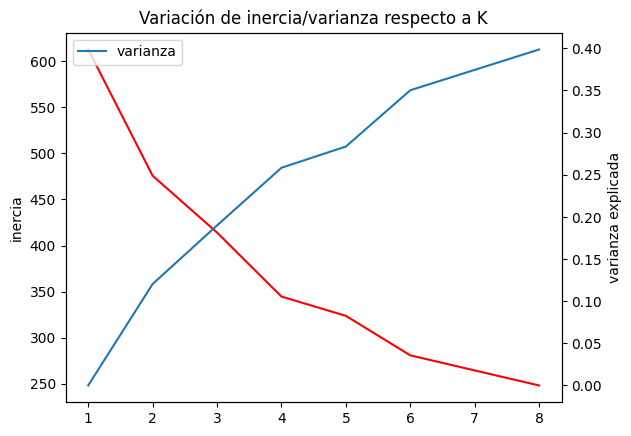

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][0] for c in resultados_k.items()], label="inercia", color="red")
ax1.set_ylabel('inercia')

ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][1] for c in resultados_k.items()], label="varianza")
ax2.set_ylabel('varianza explicada')

plt.xlabel("K")
plt.legend()
plt.title("Variación de inercia/varianza respecto a K");

**Se oprta por tener un K=3 por el metodo del Codo**

# K-Medias

Scikit-learn implementa KMedias en el módulo [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
estimador_kmedias = KMeans(random_state=666, n_clusters=3)

estimador_kmedias.fit(df_procesado)

KMeans(n_clusters=3, random_state=666)

Dado que es aprendizaje supervisado, nos interesan las clases (los clusters) de los datos de entrenamiento.

In [ ]:
clusters = estimador_kmedias.labels_
clusters

array([0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0,

No obstante, como cualquier estimador, podemos usarlo para asignar clusters a nuevos elementos.

In [ ]:
estimador_kmedias.predict(df_procesado)

array([0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0,

In [ ]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 3.10483871e-01,  3.14935670e-01,  4.23900293e-01,
         6.83766607e-02,  1.20967742e-01,  1.04838710e-01,
         1.08964680e-01,  2.44753206e-01,  2.15577017e-01,
         1.34872080e-02,  2.77473367e-01,  6.99457401e-02,
         2.77555756e-17,  1.38777878e-17,  1.38777878e-17,
         1.00000000e+00,  2.77555756e-17,  8.06451613e-03,
         6.93889390e-18,  3.88578059e-16,  7.82258065e-01,
         1.08870968e-01,  9.67741935e-02],
       [ 3.20512821e-01,  2.90277160e-01,  5.74358974e-01,
         6.93325628e-02,  1.02564103e-01,  8.54700855e-02,
         9.17874086e-02,  2.33704047e-01,  2.69003235e-01,
         1.98938992e-02,  2.43021259e-01,  5.57659425e-02,
         5.12820513e-02, -2.60208521e-18, -2.60208521e-18,
         5.64102564e-01,  2.56410256e-02, -1.73472348e-18,
        -1.30104261e-18,  1.00000000e+00,  4.44089210e-16,
         1.52655666e-16,  8.32667268e-17],
       [ 3.19327731e-01,  4.83776169e-01,  6.49503438e-01,
         8.83176862e-02,  1.2

In [ ]:
pd.DataFrame(centroides)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.310484,0.314936,0.423900,0.068377,0.120968,0.104839,0.108965,0.244753,0.215577,0.013487,...,1.387779e-17,1.387779e-17,1.000000e+00,2.775558e-17,8.064516e-03,6.938894e-18,3.885781e-16,7.822581e-01,1.088710e-01,9.677419e-02
1,0.320513,0.290277,0.574359,0.069333,0.102564,0.085470,0.091787,0.233704,0.269003,0.019894,...,-2.602085e-18,-2.602085e-18,5.641026e-01,2.564103e-02,-1.734723e-18,-1.301043e-18,1.000000e+00,4.440892e-16,1.526557e-16,8.326673e-17
2,0.319328,0.483776,0.649503,0.088318,0.123249,0.070028,0.125185,0.256961,0.192213,0.000580,...,1.680672e-02,1.680672e-02,2.220446e-16,1.680672e-02,8.403361e-03,8.403361e-03,-3.608225e-16,8.487395e-01,9.243697e-02,4.201681e-02


In [ ]:
centroides.shape

(3, 23)

Podemos ver también la inercia final de los clusters

In [ ]:
estimador_kmedias.inertia_

412.8578962795315

In [ ]:
estimador_kmedias.n_iter_

4

Los hiperparámetros más importantes del algoritmo `KMeans`:

- **n_clusters**: El número de clusters a crear, o sea **K**. Por defecto es 8
- **init**: Método de inicialización. Un problema que tiene el algoritmo K-Medias es que la solucción alcanzada varia según la inicialización de los centroides. `sklearn` empieza usando el método `kmeans++` que es una versión más moderna y que proporciona mejores resultados que la inicialización aleatoria (random)
- **n_init**: El número de inicializaciones a probar. Básicamente `KMeans` aplica el algoritmo `n_init` veces y elige los clusters que minimizan la inercia.
- **max_iter**: Máximo número de iteraciones para llegar al criterio de parada.
- **tol**: Tolerancia para declarar criterio de parada (cuanto más grande, antes parará el algoritmo).



In [ ]:
from sklearn.metrics import euclidean_distances

In [ ]:
distancias_centroides = euclidean_distances(centroides)
pd.DataFrame(distancias_centroides)

,0,1,2
0,0.000000,1.362082,1.063754
1,1.362082,0.000000,1.458060
2,1.063754,1.458060,0.000000


In [ ]:
list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1)))

[(1, 1.3620816734173318), (2, 1.4580599665621694), (1, 1.4580599665621694)]

In [ ]:
def resumen_cluster(cluster_id):
    cluster = df[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster[datos_numericos.columns].mean().round(2).to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [ ]:
comparar_clusters(0,1,2)

cluster_id,0,1,2
EST_CIVIL,SOLTERO,SOLTERO,CASADO
F33_GRADO_INS_3,SECUNDARIA,PRIMARIA,SECUNDARIA
FLG_CAMPAÑA,0.31,0.32,0.32
ANTIGUEDAD_PRODUC,108.97,100.44,167.39
F33_EDAD,45.31,53.59,57.72
INGRESO_PROM_INDEPEN,7036.38,7113.76,8650.6
NUM_CTAS_AHORRO,1.36,1.31,1.37
CTD_SEG,0.31,0.26,0.21
SDSBOLSO_MYPE,33177.69,28033.92,38035.03
NCUOTAS_MYPE,21.31,20.4,22.33


Una parte de la fase de Análisis Exploratorio de Datos es incluir un clustering para indicar posibles grupos naturales en el dataset. Ésto está indicado en el artículo original que explica este framework ([link en inglés](http://blog.districtdatalabs.com/data-exploration-with-python-2))

In [ ]:
def kmeans_cluster(df, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [ ]:
 model = KMeans(n_clusters=3, random_state=42)

In [ ]:
model.fit_predict(df_procesado)

array([0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,

In [ ]:
clusters = model.fit_predict(df_procesado)

In [ ]:
cluster_results = df_procesado.copy()
cluster_results['Cluster'] = clusters

In [ ]:
cluster_results = kmeans_cluster(df_procesado, 3)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [ ]:
cluster_summary

,ANTIGUEDAD_PRODUC,CTD_ENTIDADES_RCC,CTD_SEG,DIAS_ATRASO_MYPE,EST_CIVIL_CONVIVIENTE,EST_CIVIL_DIVORCIADO,EST_CIVIL_SEPARADO,EST_CIVIL_SOLTERO,EST_CIVIL_VIUDO,F33_EDAD,...,F33_GRADO_INS_3_SECUNDARIA,F33_GRADO_INS_3_SUPERIOR TECNICO,F33_GRADO_INS_3_SUPERIOR UNIVERSITARIO,FLG_CAMPAÑA,INGRESO_PROM_INDEPEN,NCUOTAS_MYPE,NUM_CTAS_AHORRO,SALDO_TOTAL_RCC,SDSBOLSO_MYPE,STASA_MYPE
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.300932,0.265443,0.102041,0.023927,0.000000,0.000000,0.000000,1.0,0.000000,0.442486,...,0.000000,0.275510,0.244898,0.326531,0.056844,0.232481,0.091837,0.063707,0.101062,0.243579
1,0.317085,0.273929,0.108247,0.013153,0.000000,0.000000,0.000000,1.0,0.000000,0.432615,...,1.000000,0.000000,0.000000,0.319588,0.069566,0.245063,0.127148,0.068379,0.106326,0.218641
2,0.439930,0.271228,0.065359,0.000451,0.183007,0.013072,0.013072,0.0,0.026144,0.653119,...,0.660131,0.071895,0.032680,0.300654,0.090252,0.256083,0.124183,0.075088,0.121231,0.202821
